In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [117]:
from keras.preprocessing.image import ImageDataGenerator

In [118]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [272]:
x_train=train_datagen.flow_from_directory(r"C:\Users\ADMIN\Downloads\Crop-animal data-20210317T071621Z-001\Crop-animal data\trainset",target_size=(96,96),batch_size=32,class_mode="categorical")

x_test=test_datagen.flow_from_directory(r"C:\Users\ADMIN\Downloads\Crop-animal data-20210317T071621Z-001\Crop-animal data\testset",target_size=(96,96),batch_size=32,class_mode="categorical")

Found 2785 images belonging to 10 classes.
Found 980 images belonging to 10 classes.


In [273]:
print(x_train.class_indices)

{'bears': 0, 'cats': 1, 'crows': 2, 'dogs': 3, 'elephants': 4, 'lion': 5, 'panda': 6, 'racoons': 7, 'rats': 8, 'tiger': 9}


In [274]:
print(x_test.class_indices)

{'bears': 0, 'cats': 1, 'crows': 2, 'dogs': 3, 'elephants': 4, 'lion': 5, 'panda': 6, 'racoons': 7, 'rats': 8, 'tiger': 9}


In [275]:
model=Sequential()

In [276]:
model.add(Convolution2D(32,(3,3),input_shape=(96,96,3),activation="relu"))

In [277]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [278]:
model.add(Flatten())

In [279]:
model.add(Dense(units=150,activation="relu")) #hidden layer

In [280]:
model.add(Dense(units=10,activation="softmax")) #output layer

In [282]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 70688)             0         
                                                                 
 dense_14 (Dense)            (None, 150)               10603350  
                                                                 
 dense_15 (Dense)            (None, 10)                1510      
                                                                 
Total params: 10,605,756
Trainable params: 10,605,756
Non-trainable params: 0
__________________________________________

In [283]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [284]:
model.fit(x_train,steps_per_epoch=88,epochs=50,validation_data=x_test,validation_steps=31)

Epoch 1/50
88/88 [==============================] - 226s 3s/step - loss: 3.1960 - accuracy: 0.1838 - val_loss: 1.8775 - val_accuracy: 0.3276
Epoch 2/50
88/88 [==============================] - 45s 507ms/step - loss: 1.8176 - accuracy: 0.3487 - val_loss: 1.7864 - val_accuracy: 0.3694
Epoch 3/50
88/88 [==============================] - 33s 376ms/step - loss: 1.7686 - accuracy: 0.3846 - val_loss: 1.6791 - val_accuracy: 0.4224
Epoch 4/50
88/88 [==============================] - 34s 382ms/step - loss: 1.4302 - accuracy: 0.4941 - val_loss: 1.3509 - val_accuracy: 0.5357
Epoch 5/50
88/88 [==============================] - 33s 377ms/step - loss: 1.2928 - accuracy: 0.5472 - val_loss: 1.3009 - val_accuracy: 0.5520
Epoch 6/50
88/88 [==============================] - 31s 353ms/step - loss: 1.1916 - accuracy: 0.5903 - val_loss: 1.2400 - val_accuracy: 0.5806
Epoch 7/50
88/88 [==============================] - 33s 375ms/step - loss: 1.1353 - accuracy: 0.5968 - val_loss: 1.4055 - val_accuracy: 0.5245
E

In [ ]:
original dataset have 10000 images batch size=32
steps_per_epoch=10000/32(no. of images in training set/batchsize=2785/40=70)
validation steps=no. of images in testing set/batchsize=980/40=25

In [285]:
model.save("assignment.h10")

INFO:tensorflow:Assets written to: assignment.h10\assets


In [286]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import numpy as np

In [287]:
model=load_model("assignment.h10")

In [312]:
img=image.load_img(r"lion1.jpg",target_size=(96,96))

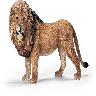

In [313]:
img


In [314]:
x=image.img_to_array(img)

In [315]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [316]:
x.shape

(96, 96, 3)

In [317]:
x=np.expand_dims(x,axis=0) #so that cnn can accept the model it accept 4 dims

In [318]:
x.shape

(1, 96, 96, 3)

In [319]:
y=model.predict(x)
y

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [320]:
x_train.class_indices

{'bears': 0,
 'cats': 1,
 'crows': 2,
 'dogs': 3,
 'elephants': 4,
 'lion': 5,
 'panda': 6,
 'racoons': 7,
 'rats': 8,
 'tiger': 9}

In [321]:
pred=np.argmax(y,axis=1)

In [322]:
pred

array([5], dtype=int64)

In [323]:
index=['bears','cats','crows','dogs','elephants','lion','panda','racoons','rats','tiger']
result=index[pred[0]]

In [324]:
result

'lion'

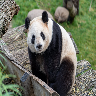

In [332]:
img1=image.load_img(r"panda1.jpg",target_size=(96,96))
img1

In [342]:
x=image.img_to_array(img1)
x

array([[[ 80.,  88.,  65.],
        [137., 144., 137.],
        [135., 138., 127.],
        ...,
        [ 54.,  92.,  45.],
        [ 74.,  97.,  51.],
        [104., 129.,  71.]],

       [[191., 191., 189.],
        [165., 163., 150.],
        [187., 193., 193.],
        ...,
        [ 57.,  97.,  45.],
        [ 89., 115.,  70.],
        [ 84., 124.,  71.]],

       [[ 40.,  39.,  45.],
        [129., 135., 125.],
        [139., 141., 136.],
        ...,
        [ 70., 108.,  61.],
        [ 90., 124.,  73.],
        [ 84., 124.,  62.]],

       ...,

       [[155., 202., 147.],
        [132., 180., 128.],
        [ 45.,  57.,  53.],
        ...,
        [ 81.,  80.,  78.],
        [154., 161., 153.],
        [106., 107., 101.]],

       [[146., 194., 132.],
        [146., 198., 136.],
        [ 88., 132.,  97.],
        ...,
        [165., 159., 161.],
        [ 24.,  30.,  26.],
        [206., 207., 202.]],

       [[133., 188., 123.],
        [145., 199., 137.],
        [117., 1

In [334]:
x=np.expand_dims(x,axis=0) 

In [335]:
x.shape

(1, 96, 96, 3)

In [336]:
y=model.predict(x)
y

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [339]:
pr=np.argmax(y,axis=1)
pr

array([6], dtype=int64)

In [340]:
result=index[pr[0]]
result

'panda'